In [ ]:
#Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Determine the directory you are going to use
%cd /content/drive/MyDrive
!mkdir MSIB
%cd /content/drive/MyDrive/MSIB

/content/drive/MyDrive
mkdir: cannot create directory ‘MSIB’: File exists
/content/drive/MyDrive/MSIB


In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all("div", class_="elementor-widget-theme-post-content") ]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/movies/doctor-strange-in-the-multiverse-of-madness-transcript/',
         'https://scrapsfromtheloft.com/movies/hustle-2022-transcript/',
         'https://scrapsfromtheloft.com/movies/hotel-transylvania-transformania-transcript/',
         'https://scrapsfromtheloft.com/movies/dont-look-up-2021-transcript/',
         'https://scrapsfromtheloft.com/movies/encanto-transcript/',
        'https://scrapsfromtheloft.com/comedy/munich-edge-of-war-transcript/']

# Movie names
movies = ['doctorstrangemultiverse', 'hustle', 'transylvaniatransformania', 'dontlookup', 'encanto', 'munich']

In [ ]:
# Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/movies/doctor-strange-in-the-multiverse-of-madness-transcript/
https://scrapsfromtheloft.com/movies/hustle-2022-transcript/
https://scrapsfromtheloft.com/movies/hotel-transylvania-transformania-transcript/
https://scrapsfromtheloft.com/movies/dont-look-up-2021-transcript/
https://scrapsfromtheloft.com/movies/encanto-transcript/
https://scrapsfromtheloft.com/comedy/munich-edge-of-war-transcript/


In [ ]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['doctorstrangemultiverse', 'hustle', 'transylvaniatransformania', 'dontlookup', 'encanto', 'munich'])

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'doctorstrangemultiverse'

In [ ]:
# Let's take a look at our data again
next(iter(data.values()))

['\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to humanity is too great for the combined forces of Strange, Wong, and Wanda Maximoff.\n* * *\n(DRAMATIC MUSIC PLAYING)\n(CREATURE ROARING)\n(CREATURE ROARS)\n(CONVERSING IN SPANISH)\nDid that kill it?\nNo.\nThat’s how we kill it.\n(HIGH-PITCHED HUMMING)\n(IN ENGLISH) The Book of Vishanti!\n(ICE CRACKING)\n(CREATURE ROARS)\nDEFENDER STRANGE: We can’t let it take your power.\nGet to the book.\nHow do we get across?\nJump.\n(BOTH YELLING)\n(GIRL SCREAMING)\nHold on!\nGIRL: No, no, no!\n(GIRL GRUNTS)\n(CREATURE ROARS)\n(GROANING)\n(ROARS)\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\n\n(GRUNTS)\n(SNARLING)\n(GASPS)\n(GRUNTS)\n(STRAINS, GRUNTS)\n(STRAINING)\n(PANTING)\n(CREATURE SNARLS)\nDEFENDER STRANGE: It’s too strong.\nI can’t hold it.\n(GROANS)\n(FLESH SEARING)\n(GROANING)\n(CREATURE GROWLS)\n(GASPS)\n(GASPS)\n(PANTING)\nI’

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
doctorstrangemultiverse,"\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to..."
dontlookup,"\n\nKate Dibiasky (Jennifer Lawrence), an astronomy grad student, and her professor Dr. Randall Mindy (Leonardo DiCaprio) make an astounding disco..."
encanto,"\n\nEncanto tells the tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibra..."
hustle,"\n\nAfter being fired, pro basketball scout, Stanley Beren, is excited, for the first time in a very long while, when he serendipitously discovers..."
munich,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki..."
transylvaniatransformania,"\n\nWhen Van Helsing’s mysterious invention, the “Monsterfication Ray”, goes haywire, Drac and his monster pals are all transformed into humans, a..."


In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
doctorstrangemultiverse,\n\ndr stephen strange casts a forbidden spell that opens the doorway to the multiverse including alternate versions of himself whose threat to hu...
dontlookup,\n\nkate dibiasky jennifer lawrence an astronomy grad student and her professor dr randall mindy leonardo dicaprio make an astounding discovery of...
encanto,\n\nencanto tells the tale of an extraordinary family the madrigals who live hidden in the mountains of colombia in a magical house in a vibrant t...
hustle,\n\nafter being fired pro basketball scout stanley beren is excited for the first time in a very long while when he serendipitously discovers span...
munich,\n\na british diplomat travels to munich in the runup to world war ii where a former classmate of his from oxford is also en route but is working ...
transylvaniatransformania,\n\nwhen van helsing’s mysterious invention the “monsterfication ray” goes haywire drac and his monster pals are all transformed into humans and j...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
doctorstrangemultiverse,dr stephen strange casts a forbidden spell that opens the doorway to the multiverse including alternate versions of himself whose threat to humani...
dontlookup,kate dibiasky jennifer lawrence an astronomy grad student and her professor dr randall mindy leonardo dicaprio make an astounding discovery of a c...
encanto,encanto tells the tale of an extraordinary family the madrigals who live hidden in the mountains of colombia in a magical house in a vibrant town ...
hustle,after being fired pro basketball scout stanley beren is excited for the first time in a very long while when he serendipitously discovers spanish ...
munich,a british diplomat travels to munich in the runup to world war ii where a former classmate of his from oxford is also en route but is working for ...
transylvaniatransformania,when van helsings mysterious invention the monsterfication ray goes haywire drac and his monster pals are all transformed into humans and johnny b...


In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
doctorstrangemultiverse,"\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to..."
dontlookup,"\n\nKate Dibiasky (Jennifer Lawrence), an astronomy grad student, and her professor Dr. Randall Mindy (Leonardo DiCaprio) make an astounding disco..."
encanto,"\n\nEncanto tells the tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibra..."
hustle,"\n\nAfter being fired, pro basketball scout, Stanley Beren, is excited, for the first time in a very long while, when he serendipitously discovers..."
munich,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki..."
transylvaniatransformania,"\n\nWhen Van Helsing’s mysterious invention, the “Monsterfication Ray”, goes haywire, Drac and his monster pals are all transformed into humans, a..."


In [ ]:
# Let's add the Movies correct name
full_names = ['Doctor Strange in The Multiverse of Madness', 'Don\'t Look Up!', 'Encanto', 'Hustle', 'Munich: The Edge of War',
              'Hotel Transylvania: Transformania']

data_df['full_name'] = full_names
data_df

,transcript,full_name
doctorstrangemultiverse,"\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to...",Doctor Strange in The Multiverse of Madness
dontlookup,"\n\nKate Dibiasky (Jennifer Lawrence), an astronomy grad student, and her professor Dr. Randall Mindy (Leonardo DiCaprio) make an astounding disco...",Don't Look Up!
encanto,"\n\nEncanto tells the tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibra...",Encanto
hustle,"\n\nAfter being fired, pro basketball scout, Stanley Beren, is excited, for the first time in a very long while, when he serendipitously discovers...",Hustle
munich,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Munich: The Edge of War
transylvaniatransformania,"\n\nWhen Van Helsing’s mysterious invention, the “Monsterfication Ray”, goes haywire, Drac and his monster pals are all transformed into humans, a...",Hotel Transylvania: Transformania


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
doctorstrangemultiverse,"\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to...",Doctor Strange in The Multiverse of Madness
dontlookup,"\n\nKate Dibiasky (Jennifer Lawrence), an astronomy grad student, and her professor Dr. Randall Mindy (Leonardo DiCaprio) make an astounding disco...",Don't Look Up!
encanto,"\n\nEncanto tells the tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibra...",Encanto
hustle,"\n\nAfter being fired, pro basketball scout, Stanley Beren, is excited, for the first time in a very long while, when he serendipitously discovers...",Hustle
munich,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Munich: The Edge of War
transylvaniatransformania,"\n\nWhen Van Helsing’s mysterious invention, the “Monsterfication Ray”, goes haywire, Drac and his monster pals are all transformed into humans, a...",Hotel Transylvania: Transformania


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each movie
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
doctorstrangemultiverse,"\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to...",Doctor Strange in The Multiverse of Madness,0.050837,0.505578
dontlookup,"\n\nKate Dibiasky (Jennifer Lawrence), an astronomy grad student, and her professor Dr. Randall Mindy (Leonardo DiCaprio) make an astounding disco...",Don't Look Up!,0.097729,0.544591
encanto,"\n\nEncanto tells the tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibra...",Encanto,0.173671,0.574315
hustle,"\n\nAfter being fired, pro basketball scout, Stanley Beren, is excited, for the first time in a very long while, when he serendipitously discovers...",Hustle,0.162948,0.503104
munich,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Munich: The Edge of War,0.105810,0.423666
transylvaniatransformania,"\n\nWhen Van Helsing’s mysterious invention, the “Monsterfication Ray”, goes haywire, Drac and his monster pals are all transformed into humans, a...",Hotel Transylvania: Transformania,0.133073,0.549190


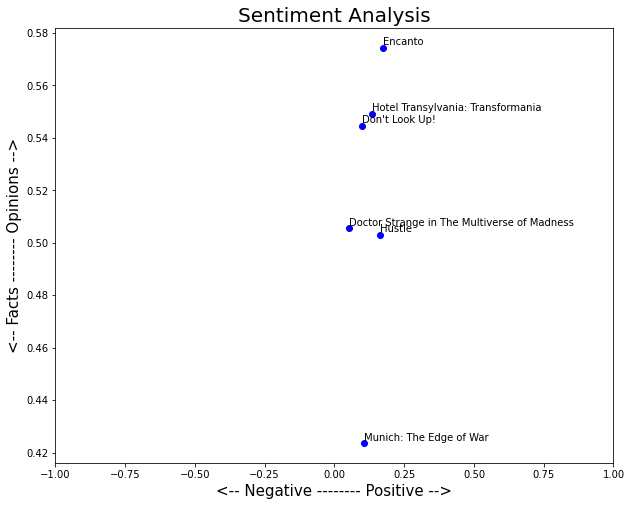

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
# Split each movie into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
doctorstrangemultiverse,"\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to...",Doctor Strange in The Multiverse of Madness,0.050837,0.505578
dontlookup,"\n\nKate Dibiasky (Jennifer Lawrence), an astronomy grad student, and her professor Dr. Randall Mindy (Leonardo DiCaprio) make an astounding disco...",Don't Look Up!,0.097729,0.544591
encanto,"\n\nEncanto tells the tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibra...",Encanto,0.173671,0.574315
hustle,"\n\nAfter being fired, pro basketball scout, Stanley Beren, is excited, for the first time in a very long while, when he serendipitously discovers...",Hustle,0.162948,0.503104
munich,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Munich: The Edge of War,0.105810,0.423666
transylvaniatransformania,"\n\nWhen Van Helsing’s mysterious invention, the “Monsterfication Ray”, goes haywire, Drac and his monster pals are all transformed into humans, a...",Hotel Transylvania: Transformania,0.133073,0.549190


In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['\n\nDr. Stephen Strange casts a forbidden spell that opens the doorway to the multiverse, including alternate versions of himself, whose threat to humanity is too great for the combined forces of Strange, Wong, and Wanda Maximoff.\n* * *\n(DRAMATIC MUSIC PLAYING)\n(CREATURE ROARING)\n(CREATURE ROARS)\n(CONVERSING IN SPANISH)\nDid that kill it?\nNo.\nThat’s how we kill it.\n(HIGH-PITCHED HUMMING)\n(IN ENGLISH) The Book of Vishanti!\n(ICE CRACKING)\n(CREATURE ROARS)\nDEFENDER STRANGE: We can’t let it take your power.\nGet to the book.\nHow do we get across?\nJump.\n(BOTH YELLING)\n(GIRL SCREAMING)\nHold on!\nGIRL: No, no, no!\n(GIRL GRUNTS)\n(CREATURE ROARS)\n(GROANING)\n(ROARS)\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\n\n(GRUNTS)\n(SNARLING)\n(GASPS)\n(GRUNTS)\n(STRAINS, GRUNTS)\n(STRAINING)\n(PANTING)\n(CREATURE SNARLS)\nDEFENDER STRANGE: It’s too strong.\nI can’t hold it.\n(GROANS)\n(FLESH SEARING)\n(GROANING)\n(CREATURE GROWLS)\n(GASPS)\n(GASPS)\n(PANTING)\nI

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

6

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.17068713450292397,
  0.07764157014157012,
  0.08991209464555047,
  0.025727219934537006,
  0.018857473544973562,
  0.05638706140350877,
  -0.05427109440267333,
  -0.014990371148459372,
  0.027820375971060893,
  0.10992947195772425],
 [0.057957717569786536,
  0.09834952557580293,
  0.14287930660479684,
  0.0872848563473563,
  0.14225839303272927,
  0.0680771604938272,
  0.040191229109005765,
  0.12677309996846425,
  0.056021589191232055,
  0.13183414264828736],
 [0.3278922659130993,
  0.23764807241369745,
  0.21837615324982357,
  0.1756804897429897,
  0.03145564751033503,
  0.2107950664431197,
  0.08121141975308639,
  0.14714913269600774,
  0.014941797248135267,
  0.2468751002084337],
 [0.1215084325396825,
  0.2612349378671923,
  0.016683595456531246,
  0.17614805796055802,
  0.1610441213375996,
  0.13153361899728172,
  0.2086296169108669,
  0.14388576037951864,
  0.18457518424036276,
  0.21407456005112255],
 [0.06575183138352557,
  0.04698585416156172,
  0.14278381283068786,
  0.14

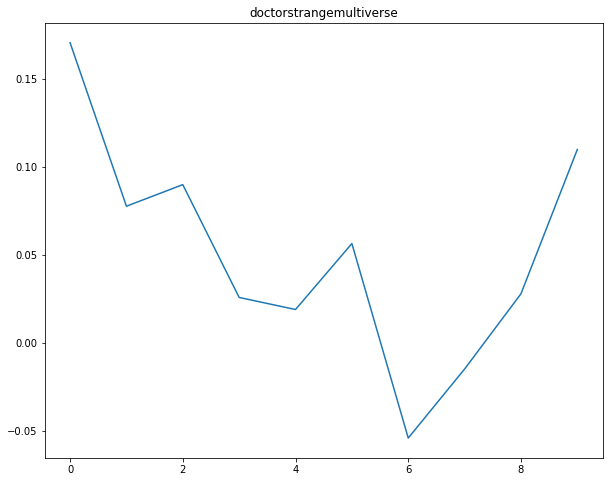

In [ ]:
# Show the plot for one movie
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

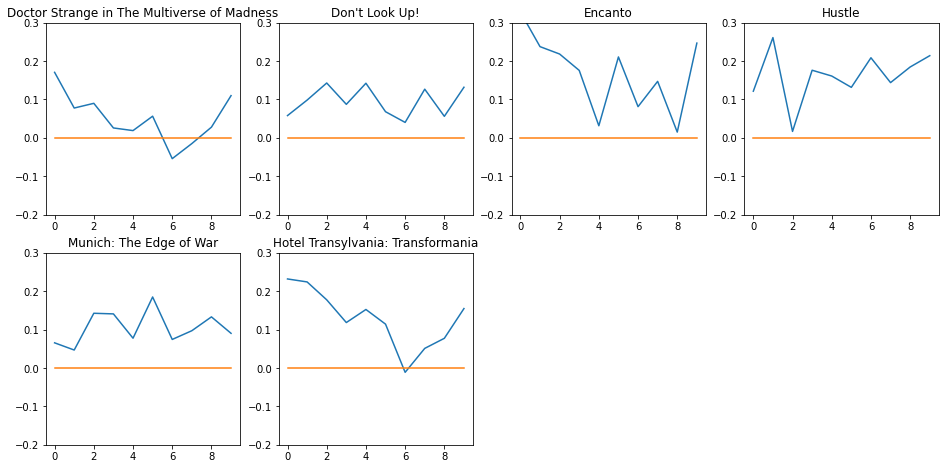

In [ ]:
# Show the plot for all movies
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()